# Introducción a Python
Python es un lenguaje de programación. Sirve para dar instrucciones a un ordenador. Un curso de introducción a python nos llevaría varias horas, pero vamos a intentar sintetizar los conocimientos básicos aquí. En primer lugar, podemos hacer operaciones: 

In [1]:
3+2

5

También podemos utilizar variables:

In [2]:
var1 = 3
var2 = 2
var1+var2

5

que se mantienen en el tiempo:

In [3]:
var1 = 2
var1+var2

4

Y que podemos almacenar y mostrar por pantalla: 

In [4]:
var3 = var1 + var2
print(var3)

4


También hay funciones, que son básicamente "apodos" para una serie de operaciones, como una receta de cocina: 

In [5]:
def suma(x, y):
    return x + y 

var4 = suma(var1, var2)
print(var4)

4


Podemos hacer que una función o varias operaciones se repitan en el tiempo usando bucles como `for`, y controlar cuando se realiza algo con expresiones como `if` y `else`: 

In [8]:
def multiplica(x,y):
    return x*y

acum = 1
for i in range(3):
    acum = suma(acum, 1)
    acum = multiplica(acum, 2)

print(acum)

22


In [7]:
acum = 1
for i in range(10):
    if i%2==0:
        acum = suma(acum, 1)

print(acum)

6


Y por último, a nivel básico, tenemos librerías, que contienen funciones. Como `numpy`, la librería estándar para trabajar con matrices. O `pytorch`, la que vamos a usar en este curso para realizar redes neuronales: 

In [12]:
import numpy as np 

array = np.array([1, 2])

print(np.sum(array))
print(np.prod(array))

3
2


# Programando con Pytorch
Pytorch es una librería (o lo que se conoce como un *framework*) que reúne una serie de utilidades para trabajar con cálculo tensorial. Un Tensor es la versión N-dimensional de una matriz, que puede tener un número arbitrario de dimensiones. 

El manejo eficiente de los tensores, y su posibilidad de utilizarlos en procesadores paralelos como las tarjetas gráficas (GPUs) es lo que ha catapultado la revolución del *deep learning* desde el año 2013. 

Hay muchas librerías para trabajar con tensores, entre ellas la más conocida: `Tensorflow`. Sin embargo, pytorch está ganando mucha fuerza en los últimos años, ya que está soportado por Facebook, y es usado activamente en grandes empresas como Uber, Salesforce o Tesla. 

Los más familiares con el lenguaje Python para cálculos técnicos y científicos seguramente conozcan `numpy`. Pytorch está organizado de forma muy similar, pero para igualar el nivel, y comenzar desde cero, vamos a dar nuestros primeros pasos. 

## Primeros pasos con Pytorch
Vamos a crear nuestro primer tensor, a partir de datos directamente, de arrays o de otros tensores. En primer lugar cargamos las librerías necesarias:


In [ ]:
import torch
import numpy as np 

Como véis hemos cargado también numpy, aunque no nos hará falta en este tutorial. Vamos a crear nuestro primer tensor **a partir de datos**:

In [ ]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

Podemos comprobar qué hay dentro de la variable `x_data` así: 

In [ ]:
print(x_data)

tensor([[1, 2],
        [3, 4]])


Vemos que es una estructura similar a una matriz pero de tipo tensor. Vamos a crear ahora otros datos a partir de un array de numpy:

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

Esto es muy útil en los casos en que dispongamos de datos como arrays de numpy (caso muy frecuente en la vida real). Por último, vamos a crear tensores a partir de otros tensores de pytoch:

In [ ]:
x_ones = torch.ones_like(x_data) # creamos un tensor de 1 con las dimensiones de x_data
print(f"Tensor de unos: \n {x_ones}\n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # tensor aleatorio con datos "float"
print(f"Tensor random: \n {x_rand}\n")

Tensor de unos: 
 tensor([[1, 1],
        [1, 1]])

Tensor random: 
 tensor([[0.8679, 0.6779],
        [0.9502, 0.9748]])



Hemos utilizado print para mostrar los datos de los tensores. 

Hemos visto que podemos generar un tensor de unos con un tamaño igual al de un tensor dado. Pero también podemos generar valores aleatorios o constantes a partir de las dimensiones del tensor, lo que conocemos como `shape`: 

In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Tensor Aleatorio: \n {rand_tensor}\n")
print(f"Tensor Unos: \n {ones_tensor}\n")
print(f"Tensor Ceros: \n {zeros_tensor}")

Tensor Aleatorio: 
 tensor([[0.4624, 0.8898, 0.0245],
        [0.2815, 0.9504, 0.9245]])

Tensor Unos: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]])

Tensor Ceros: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Atributos de los tensores
Los tensores son en realidad un "objeto". No sólo contienen los datos en sí (ceros, unos, etc), sino uqe también tienen unas propiedades y unos métodos que es posible visualizar, y que nos van a ayudar mucho en la vida. Generemos un tensor aleatorio y vamos a ver varias de estas propiedades y funciones: 

In [ ]:
tensor = torch.rand(3,4)

print(f"Dimensiones del tensor: {tensor.shape}")
print(f"Tipo de dato del tensor: {tensor.dtype}")
print(f"Dispositivo en el que está almacenado el tensor: {tensor.device}")
print(f"Valor medio del tensor: {tensor.mean()}")

Dimensiones del tensor: torch.Size([3, 4])
Tipo de dato del tensor: torch.float32
Dispositivo en el que está almacenado el tensor: cpu
Valor medio del tensor: 0.40055403113365173


## Operaciones con tensores
Existen más de 100 operaciones soportadas por la librería de pytorch. Estos incluyen desde el *slicing* o acceso a partes del tensor, hasta multiplicaciones y funciones más avanzadas. Vamos a comenzar viendo cómo acceder a los distintos elementos de un tensor, el famoso *slicing*:

In [ ]:
tensor = torch.ones(4,4)
print(tensor)
print(tensor[0,2])

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor(1.)


Al ser un tensor sólo relleno de unos, daría igual, pero hemos accedido a la posición del tensor en la fila 0, la columna 2. Recuerda que en casi todos los lenguajes de programación, la primera posición de un vector, array o lo que sea es 0. 

Podemos modificar partes de un tensor utilizando *slicing*:

In [ ]:
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


Podemos recuperar un subtensor mediante estas técnicas. Por ejemplo, para obtener las filas de la 0 a la 2, y las columnas de la 1 en adelante, usamos: 

In [ ]:
print(tensor[:3, 1:])

tensor([[0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]])


Podemos también concatenar diferentes tensores en una dimension dada. Existen varias funciones para esto, como `torch.cat` o `torch.stack`. Aquí nos centraremos en una, pero la documentación de pytorch es bastante completa en este sentido. 

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


Podemos sumar varios tensores: 

In [ ]:
tensor2 = torch.rand_like(tensor)
print(tensor2)
print(f"Suma: \n{tensor+tensor2}")

tensor([[0.8648, 0.5517, 0.7192, 0.1277],
        [0.8661, 0.2795, 0.0468, 0.0321],
        [0.7303, 0.5403, 0.6252, 0.1478],
        [0.9980, 0.3105, 0.2492, 0.9086]])
Suma: 
tensor([[6.8648, 5.5517, 6.7192, 6.1277],
        [6.8661, 5.2795, 6.0468, 6.0321],
        [6.7303, 5.5403, 6.6252, 6.1478],
        [6.9980, 5.3105, 6.2492, 6.9086]])


Vamos a multiplicar tensores entre sí, elemento a elemento (no confundir con producto de matrices):

In [ ]:
print(f"tensor*tensor \n {tensor*tensor}")

#O una versión alternativa:
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)}")


tensor*tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


Para multiplicar tensores en forma matricial, podemos hacer uso de las dos sintaxis vistas anteriormente: 

In [ ]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternativa:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


 ## Jugando con los procesadores
 Todas estas pueden ser realizadas en la CPU (procesador del ordenador) o la GPU (procesador gráfico, más rápido para operaciones paralelas). Por defecto, los tensores están creados en la CPU, pero podemos moverlos entre ambas. Como estamos en Colab, si por defecto no tenemos GPU podemos hacerlo en "Entorno de Ejecución> Cambiar tipo de entorno de ejecución", y seleccionar un acelerador por GPU. 

In [ ]:
if torch.cuda.is_available():
  tensor_cuda = tensor.to('cuda')

In [ ]:
print(type(tensor))
print(type(tensor_cuda))

<class 'torch.Tensor'>


NameError: ignored

# `Torch.autograd`, la magia está servida
Como hemos comentado anteriormente, las redes neuornales están definidas fundamentalmente por tres pasos: 
1. **Propagación hacia adelante** (*forward pass*): se introduce unos datos en la red y se realizan los cálculos necesarios hasta dar una salida. 
2. **Cálculo de la pérdida** (*loss*). Se compara la salida de la red con la salida esperada para cuantificar lo "acertado" de nuestra red. 
3. **Propagación hacia atrás** (*backward pass* o *backpropagation*). Se calcula el gradiente de la pérdida con respecto a cada entrada y salida de las neuronas, y se ajustan los parámetros

Para el último paso, es importante ser capaces de calcular el gradiente, el diferencial de una entrada con respecto a una salida, para poder actualizar los pesos de la red neuronal. Pero, ¿cómo calculamos el gradiente automáticamente? 

Ahí está el truco del almendruco. `torch.autograd` lo hace por nosotros.

¿Cómo? Allá vamos! 

In [ ]:
import torch

a = torch.tensor([2., 3.], requires_grad=True) 
b = torch.tensor([6., 4.], requires_grad=True)

Como véis es muy similar a lo que hemos realizado anteriormente, pero en este caso añadimos la coletilla `requires_grad`. Ésto significa que vamos a almacenar el gradiente, una "memoria" de la operación a realizar. Veamos qué ocurre si queremos calcular $Q = 3a^3 - b^2$. 

In [ ]:
Q = 3*a**3 - b**2
print(Q)

tensor([-12.,  65.], grad_fn=<SubBackward0>)


Vemos que en este caso se ha almacenado una `grad_fn`, la función con respecto a la cual calcular el gradiente. Siendo `SubBackward`, podemos asumir que es 0. 

Internamente, el programa está haciendo lo siguiente: 

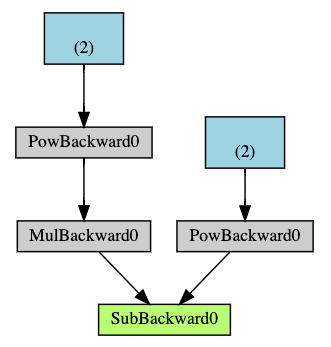

Así, de esta manera podríamos calcular los gradientes de Q con respecto a los tensores `a` y `b`: 
$$\frac{\partial Q}{\partial a} = 9a^2$$
$$\frac{\partial Q}{\partial b} = -2b$$

Como hemos calculado Q a partir de tensores con la opción `requires_grad`, damos la orden de calcular todos los gradientes parciales usando la propiedad `.backward()`. Ya que Q es una matriz, necesitamos calcular el tope, podríamos usar `.sum()` o definir un gradiente: 

In [ ]:
Q.sum().backward()

Con este dato, ya hemos almacenado los gradientes, y comprobamos si están bien calculados comparándolos con los calculados a mano: 

In [ ]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


## Autograd para aprendizaje automático
Así pues, este procedimiento es el que se realiza para crear modelos de aprendizaje automático. Por ejemplo, vamos a realizar una regresión simple. La regresión, si recordamos, trata de relacionar dos variables $x$ e $y$ (que habitualmente se conocen como variable independiente y variable dependiente) de la forma: 

$$ y = w*x + b$$

Vamos a intentar estimar $w$ y $b$ a partir de los datos siguientes: 

In [ ]:
# Datos para regresión lineal 
x = torch.Tensor([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1]).view(17, 1)
y = torch.Tensor([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3]).view(17, 1)

Una buena práctica para saber qué estamos haciendo es mostrarlo. Para ello utilizamos la librería de mostrar gráficos `matplotlib`: 

Text(0, 0.5, 'Variable Dependiente')

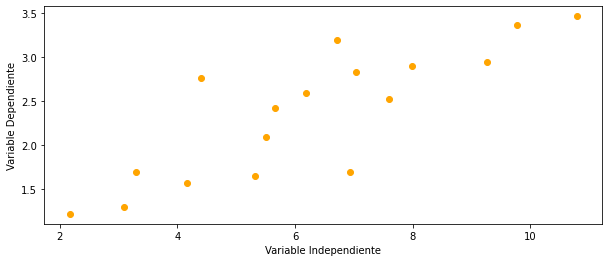

In [ ]:
import matplotlib.pyplot as plt 

# Muestra los datos
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(x, y, color = "orange")
ax.set_xlabel('Variable Independiente')
ax.set_ylabel('Variable Dependiente')

Observamos que hay una clara tendencia lineal entre la variable independiente y la variable dependiente. Para entrenar el modelo, tenemos que partir de unos parámetros $w$ y $b$ aleatorios:

In [ ]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(w)
print(b)

tensor([-0.0286], requires_grad=True)
tensor([0.3545], requires_grad=True)


Y a continuación definiremos nuestro modelo: 

In [ ]:
def model(x):
  return x @ w.t() + b

La matriz que obtenemos como salida del modelo serán las predicciones: 

In [ ]:
preds = model(x)
print(preds)

tensor([0.3645, 0.3664, 0.3683, 0.3704, 0.3707, 0.3660, 0.3756, 0.3695, 0.3719,
        0.3626, 0.3709, 0.3774, 0.3680, 0.3726, 0.3685, 0.3748, 0.3642],
       grad_fn=<AddBackward0>)


Esto, en una red neuronal, sería el **forward pass**. En este modelo, sin entrenar, nos daría la siguiente recta:

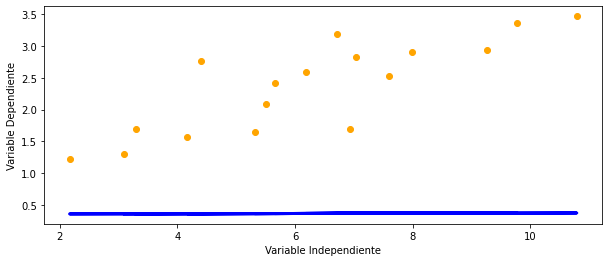

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(x, y, color = "orange")
ax.set_xlabel('Variable Independiente')
ax.set_ylabel('Variable Dependiente')
ax.plot(x, preds.detach(), 'b-', lw=3) # cuidado con .detach(), matplotlib no puede mostrar cosas que almacenen gradiente. 

Para comparar las predicciones con las originales definimos una función de loss. Para un ajuste por mínimos cuadrados utilizamos el error cuadrático medio: 
$$ \frac{1}{N}\sum{(preds-y)^2}$$

Afortunadamente, esta es una de las funciones más utilizadas en aprendizaje, así que está en pytorch almacenada como `torch.nn.MSELoss()`

In [ ]:
loss_func = torch.nn.MSELoss()
loss = loss_func(preds.view(17,1), y)
print(loss)

tensor(4.4831, grad_fn=<MseLossBackward>)


Como hemos visto antes, ahora hay que computar el gradiente con respecto a cada peso, y actualizar los mismos para que aprenda: 

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([-27.6149])
tensor([-3.9934])


Para ajustar los pesos, utilizaríamos una constante (*learning rate*) que multiplicamos por el gradiente, y tendríamos una nueva estimación: 

In [ ]:
with torch.no_grad():
  w -= w.grad*1e-2
  b -= b.grad*1e-2
  print(w)
  w.grad.zero_()
  b.grad.zero_()

tensor([0.2779], requires_grad=True)


In [ ]:
print(w)
print(b)

tensor([0.2779], requires_grad=True)
tensor([0.3988], requires_grad=True)


Y ya hemos visto cómo se han actualizado los pesos. Esto daría lugar a la siguiente recta:

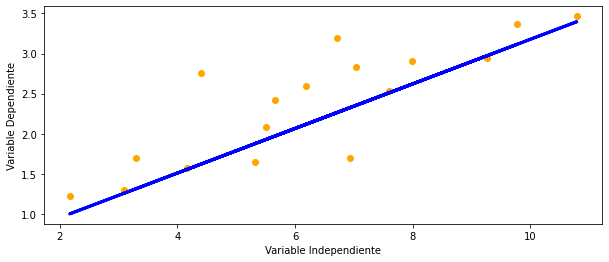

In [ ]:
preds = model(x)
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(x, y, color = "orange")
ax.set_xlabel('Variable Independiente')
ax.set_ylabel('Variable Dependiente')
ax.plot(x, preds.detach(), 'b-', lw=3) # cuidado con .detach(), matplotlib no puede mostrar cosas que almacenen gradiente. 

## Regresión como una red neuronal
El algoritmo que hemos definido se llama descenso de gradiente, y está implementado también en pytorch como `pytorch.optim.SGD`. Asimismo, los parámetros del modelo se pueden ver como una capa lineal de 2 neuronas, como ya hemos visto. De este modo podemos construir un modelo de red neuronal para regresión muy sencillo: 

In [ ]:
class Regresion(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(Regresion, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

Ahora podemos definir la red, el optimizador y el loss:

In [ ]:
model = Regresion(1, 1)
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

Y podremos realizar el bucle de entrenamiento: 

In [ ]:
for e in range(20):
  optimizer.zero_grad() # nos aseguramos que todos los grad. estén a 0

  preds = model(x) # forward pass
  loss = loss_func(preds.view(17,1), y) 
  loss.backward() # backward pass
  optimizer.step()
  print(f"Step: {e}, Loss: {loss.item()}")

Step: 0, Loss: 61.8243408203125
Step: 1, Loss: 0.7637394070625305
Step: 2, Loss: 0.19162237644195557
Step: 3, Loss: 0.1861078441143036
Step: 4, Loss: 0.18590152263641357
Step: 5, Loss: 0.18574562668800354
Step: 6, Loss: 0.18559102714061737
Step: 7, Loss: 0.1854371428489685
Step: 8, Loss: 0.18528400361537933
Step: 9, Loss: 0.18513157963752747
Step: 10, Loss: 0.18497994542121887
Step: 11, Loss: 0.1848290115594864
Step: 12, Loss: 0.1846788227558136
Step: 13, Loss: 0.1845293492078781
Step: 14, Loss: 0.18438062071800232
Step: 15, Loss: 0.18423259258270264
Step: 16, Loss: 0.18408526480197906
Step: 17, Loss: 0.18393872678279877
Step: 18, Loss: 0.18379279971122742
Step: 19, Loss: 0.18364763259887695


Y visualizamos el resultado de nuestra regresión

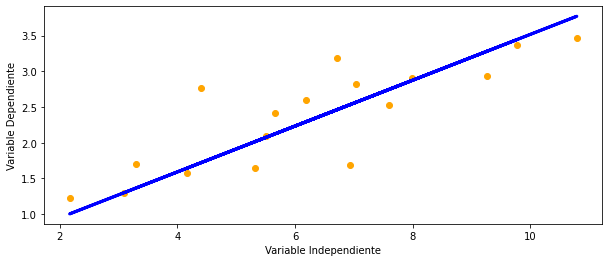

In [ ]:
preds = model(x)
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(x, y, color = "orange")
ax.set_xlabel('Variable Independiente')
ax.set_ylabel('Variable Dependiente')
ax.plot(x, preds.detach(), 'b-', lw=3) # cuidado con .detach(), matplotlib no puede mostrar cosas que almacenen gradiente. 

Y los valores de nuestras variables: 

In [ ]:
print(f'w es: {model.linear.weight}')
print(f'b es: {model.linear.bias}')

w es: Parameter containing:
tensor([[0.3207]], requires_grad=True)
b es: Parameter containing:
tensor([0.3094], requires_grad=True)
